<a id='top'></a>
# Introduction to Time Series

<center>
<img src='https://memegenerator.net/img/instances/81204821/im-afraid-we-need-to-use-math.jpg'>
</center>

_____

## References / Further Reading

* [Time Series Text](http://db.ucsd.edu/static/TimeSeries.pdf)

* [More on Time Series](https://otexts.com/fpp2/components.html)

* [Dynamic Time Warping Slide-Deck](https://www.cs.unm.edu/~mueen/DTW.pdf)

* [Self-Similarity Slide-Deck](https://www.cs.unm.edu/~mueen/Tutorial/CIKM2016Tutorial.pdf)

<center>
<img src='https://memegenerator.net/img/instances/71458205/when-did-you-become-an-expert-on-time-series-analysis-and-autoregression-models-last-night.jpg
'>
</center>

_____

## Time Series Models




### Models for Stochastic Processes

* Autoregressive (AR) Models,

$$
y_t = \mu_t 
    + \varphi_1 y_{t-1} + \varphi_2 y_{t-2} + \cdots + \varphi_p y_{t-p} 
    + \epsilon_t
$$

* Moving Average (MA) Models,

$$
y_t = \mu_t + \epsilon_t
    + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + + \theta_q \epsilon_{t-q}    
$$

* Autoregressive Moving Average (ARMA) Models,

$$
y_t = c + \varphi_1 y_{t-1} + \varphi_2 y_{t-2} + \cdots + \varphi_p y_{t-p} + \epsilon_t
        + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + + \theta_q \epsilon_{t-q}
$$

* Autoregressive Integrated Moving Average (ARIMA) Models,

$$
x_t = c + \varphi_1 x_{t-1} + \varphi_2 x_{t-2} + \cdots + \varphi_p x_{t-p} + \epsilon_t
        + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + + \theta_q \epsilon_{t-q}
$$
$$
\textrm{with} 
$$
$$
x_t = D_d(y_t) = D_{d-1}\big(D_1(y_t)\big) = D_{d-1}\big(y_t - y_{t-1}\big) = \cdots = y_t - d y_{t-1} + \frac{d(d-1)}{2} y_{t-2} - \cdots + (-1)^d y_{t-d} 
$$

<center>
<img src='http://customerthink.com/wp-content/uploads/2-tmi.jpg'>
</center>

* Seasonal Autoregressive Integrated Moving Average (sARIMA) Models,

* Autoregressive Frationally Integrated Moving Average (ARFIMA) Models,

* Vector (V) Models (such as Vector Autoregression (VAR)),

* Exogenous (X) Models (such as ARIMAX),

* etc.

### Models for Heteroskedastic Processes
*Note:* Models which capture the changes of variance over time, i.e. $\sigma^2_t \sim t$.

* Autoregressive Conditional Heteroskedasticity (ARCH),
* GARCH ('G' is for Generalized -from Engle (2003 Nobel Prize Winner) in 1982),
* GARCH-m ('m' is for "-in-mean"),
* TARCH ('T' is for Threshold),
* EGARCH ('E' is for Exponential),
* FIGARCH ('FI' is for Fractionally Integrated),
* CGARCH ('C' is for Component),
* etc.

### Recent Advances

* Wavelet-based Methods,

* Autoencoder-based Methods,

* Model-free Techniques and Hybrid Models,

* Dynamic Bayesian Networks (Hidden Markov Model (HMM) is the simplest example),

* Recurrent Neural Networks (RNN) such as:
    * Long Short-Term Memory (LSTM) Networks,
    * Gated Recurrent Unit (GRU) Networks,
    * etc.

<center>
<img src='https://i.pinimg.com/736x/0e/15/f8/0e15f8f3c42b54b9403c79f5f4d526d9--funny-cartoons-funny-memes.jpg'>
</center>
    
_____

## Table of Contents

[Back to Top](#top)

* [Basic Facts](#facts)

* [Import Libraries](#import)

* [Quick Glimpse at our Data](#data)

* [Recap](#recap)

* [ACF & PACF](#acf)

* [Your Turn...](#ex)

* [Forcing Stationarity](#stationarity)
    * [Log-Scale Transformation](#log),
    * [Smoothing Transformations](#smooth),
    * [Difference Tranformation](#diff)

* [Modeling & Parsimony](#model)

<center>
<img src='http://i.lvme.me/7erw65d.jpg'>
</center>

______

<a id='facts'></a>
## Basic Facts

[Back to Top](#top)

1. **Time Series** is a collection of observations (data) made sequentially (or 'in time'). They are broken down into four components:
    * The Major Trend,
    * Seasonal,
    * Cyclical,
    * Irregular (Noise).
    
2. **Time Series** analysis is used in retail, marketing, e-commerce, fraud detection, astro-physics (e.g. exoplanet detection), finance (e.g. stocks, funds, options, etc.), oil and gas (e.g. plunger well SCADA measurements, etc.), and --in general-- any sensor-based data.  

<center>
<img src='https://memegenerator.net/img/instances/80814038/and-they-say-pure-math-has-no-real-life-applications.jpg'>
</center>
    
3. **Stationarity** is a desirable property for time series. We say a time series is stationary if:
    * it has a constant mean (with respect to time),
    
    ![](stat1.png)
    * it has a constant variance (with respect to time),
    
    ![](stat2.png)
    * it has an auto-covariance which is not time dependent.
    
    ![](stat3.png)
    
4. If a time series has a **trend** or behaves with some **seasonal** regularity, then it is not stationary.

5. There are multiple ways to check if a time series is stationary:
    * Visually check: plot a moving average or rolling median (if there are outliers) to see if there is a relationship to time,
    * **Augumented Dickey-Fuller test**: this is a hypothesis test (we reject the null hypothesis that a time series is non-stationary if the test-statistic is less than the critical value),
    * and various other (data-specific) techniques.
    
6. TO BE CONTINUED...

_____

<a id='import'></a>
## Import Libraries

[Back to Top](#top)

In [1]:
import pandas as pd # read_csv, datetime, DataFrame
import numpy as np # random.normal, sin

from pandas.plotting import autocorrelation_plot as auto_corr

from matplotlib import pyplot as plt # for plotting
import seaborn as sns; sns.set() # for prettier plots / formatting / style

# jupyter cell magic for inline visualization
%matplotlib inline 

# tsa : time series analysis
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose as season
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# metrics
from sklearn import metrics # explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
#from sklearn.utils import check_arrays # converts list-like objects to array (if needed)

# scikit-learn models
from sklearn.linear_model import LinearRegression as LinReg

In [2]:
# set seed ... doh!
np.random.seed(31416)

# define a constant for figsize
SIZE = (10,6) # 10/6 is a good enough approximation of the golden ratio ~ 1.618

In [3]:
# MAPE: Mean Absolute Percentage Error 
## another useful metric --not implemented in sklearn.metrics
## See: https://en.wikipedia.org/wiki/Mean_absolute_percentage_error

def MAPE(y_true, y_pred): 
#     y_true, y_pred = check_arrays(y_true, y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [4]:
def report_metrics(y_true, y_pred):
    print("Explained Variance:\n\t", metrics.explained_variance_score(y_true, y_pred))
    print("MAE:\n\t", metrics.mean_absolute_error(y_true, y_pred))
    print("RMSE:\n\t", np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
    print("MAPE:\n\t", MAPE(y_true, y_pred))
    print("r^2:\n\t", metrics.r2_score(y_true, y_pred))

<a id='data'></a>
## Toy Dataset

[Back to Top](#top)

<center>
<img src='https://i.pinimg.com/originals/2a/66/ac/2a66acfdd713e7fc176e030f1e5bdb97.jpg'>
</center>


In [5]:
t = np.array(range(100))

x = 2*np.sin(2*np.pi*t/10) \
    + 0.25*t \
    + 0.72*np.sqrt(t) \
    + np.random.normal(12,1,100) 

# DESCRIPTION (of x):
# forcing some seasonality with a sinusoidal 
# adding a linear trend component 
# adding a non-linear trend component  
# injecting some noise  

df = pd.DataFrame(t, columns=['t'])
df['x'] = x

df['past'] = (df.t < 75).astype(np.int)
df['future'] = 1 - df.past

In [6]:
df.head().append(df.tail())

,t,x,past,future
0,0,10.428441,1,0
1,1,13.928055,1,0
2,2,14.630073,1,0
3,3,14.669073,1,0
4,4,13.505290,1,0
95,95,43.227811,0,1
96,96,41.274771,0,1
97,97,42.908262,0,1
98,98,42.525849,0,1
99,99,41.229399,0,1


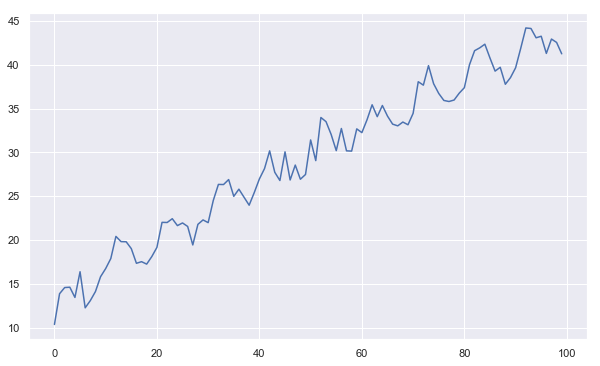

In [7]:
plt.figure(figsize=SIZE)
df['x'].plot()
plt.show()

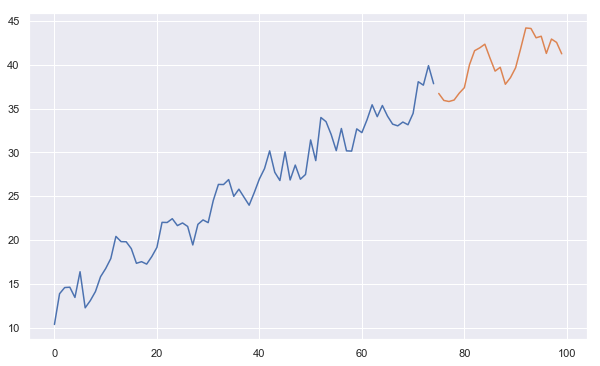

In [8]:
plt.figure(figsize=SIZE)
df.loc[df.past == 1, 'x'].plot()
df.loc[df.future == 1, 'x'].plot()
plt.show()

In [11]:
# How would you model this?

X_train = df.loc[df.past == 1, 't'].values.reshape(-1, 1)
X_test = df.loc[df.future == 1, 't'].values.reshape(-1, 1)
y_train = df.loc[df.past == 1, 'x'].values
y_test = df.loc[df.future == 1, 'x'].values

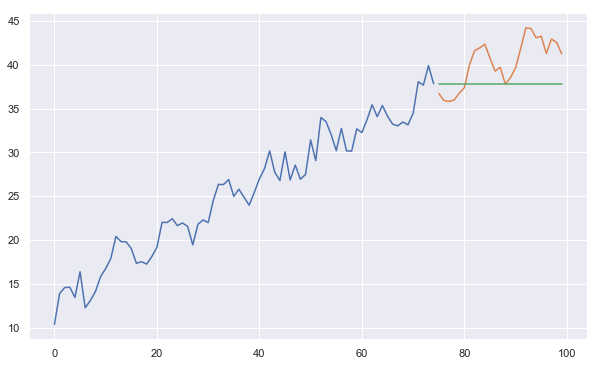

In [12]:
# naive approach

y_pred = y_train[len(y_train)-1]
y_pred = [y_pred]*25

plt.figure(figsize=SIZE)
df.loc[df.past == 1, 'x'].plot()
df.loc[df.future == 1, 'x'].plot()
plt.plot(X_test, y_pred)
plt.show()

In [13]:
report_metrics(y_test, y_pred)

Explained Variance:
	 1.1102230246251565e-16
MAE:
	 3.024382085680457
RMSE:
	 3.526759519718881
MAPE:
	 7.2989780263978465
r^2:
	 -0.7926584112673942


In [14]:
# linear trend approach

lr = LinReg(n_jobs=-1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_trend = lr.predict(X_train)

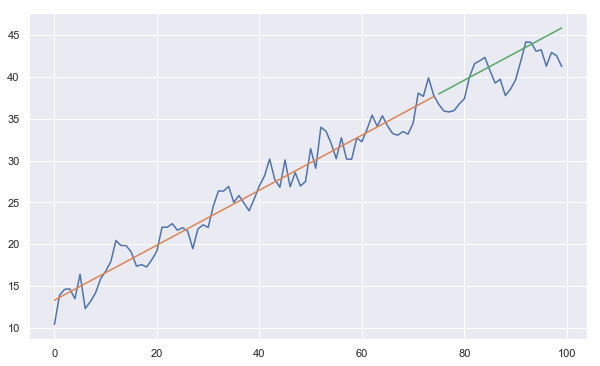

In [15]:
plt.figure(figsize=SIZE)
df['x'].plot()
plt.plot(X_train, y_trend)
plt.plot(X_test, y_pred)
plt.show()

In [16]:
report_metrics(y_test, y_pred)

Explained Variance:
	 0.5572790083202108
MAE:
	 2.1223298352548436
RMSE:
	 2.4567203825829584
MAPE:
	 5.388996111110507
r^2:
	 0.13012408428664712


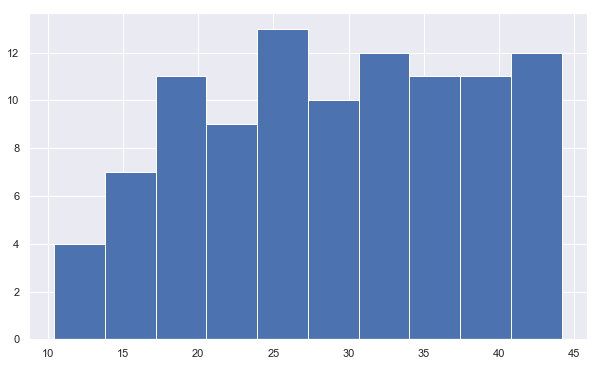

In [17]:
plt.figure(figsize=SIZE)
df.x.hist()
plt.show()

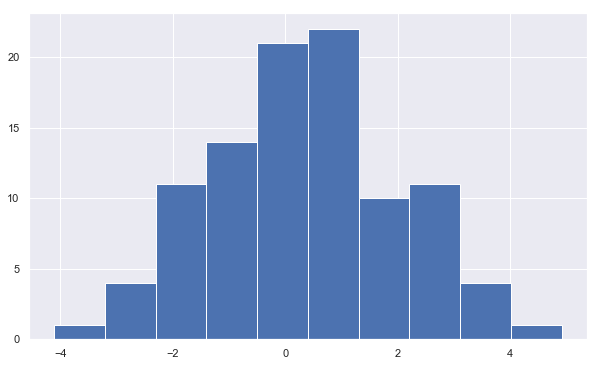

In [18]:
# what if we difference?

plt.figure(figsize=SIZE)
df.x.diff().hist()
plt.show()

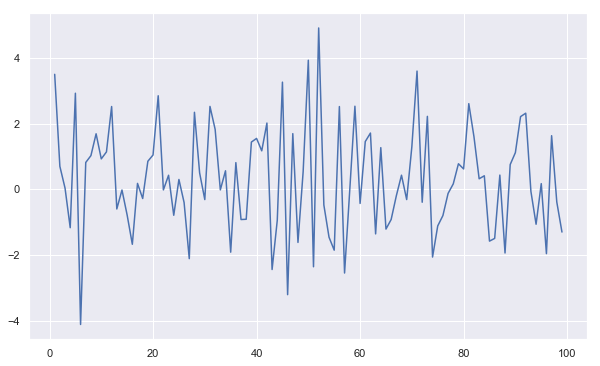

In [19]:
# does this look (more) stationary?

plt.figure(figsize=SIZE)
df.x.diff().plot()
plt.show()

In [20]:
# is this easier to predict?

df['x_diff'] = df.x.diff()
y_train = df.loc[df.past == 1, 'x_diff'].fillna(0).values
y_test = df.loc[df.future == 1, 'x_diff'].values

lr = LinReg(n_jobs=-1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_trend = lr.predict(X_train)

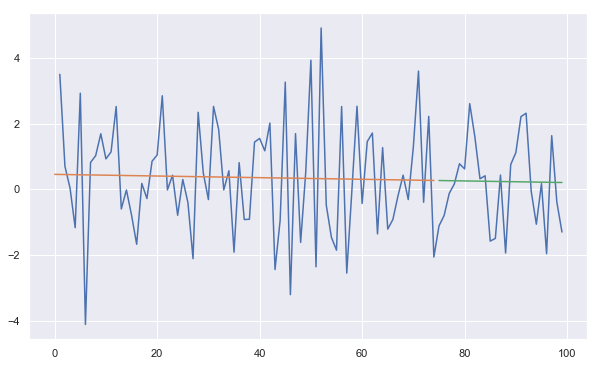

In [21]:
plt.figure(figsize=SIZE)
df['x_diff'].plot()
plt.plot(X_train, y_trend)
plt.plot(X_test, y_pred)
plt.show()

In [22]:
def rebuild_diffed(diffed_series, first_element_original):
    cumsum = pd.Series(diffed_series).cumsum()
    return cumsum.fillna(0) + first_element_original

In [23]:
y_train = rebuild_diffed(y_train, df.x[0])
y_trend = rebuild_diffed(y_trend, df.x[0])
y_test = rebuild_diffed(y_test, y_train[len(y_train)-1])
y_pred = rebuild_diffed(y_pred, y_train[len(y_train)-1])

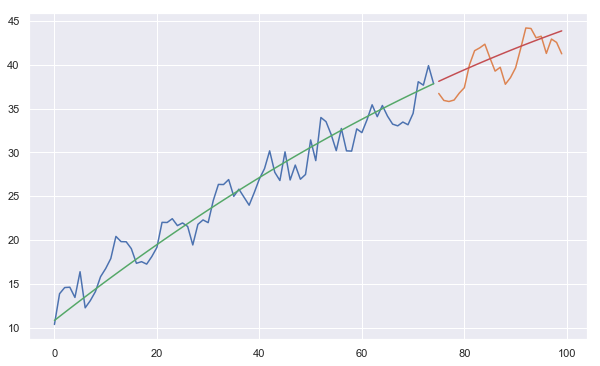

In [24]:
plt.figure(figsize=SIZE)
plt.plot(X_train, y_train)
plt.plot(X_test, y_test)
plt.plot(X_train, y_trend)
plt.plot(X_test, y_pred)
plt.show()

In [25]:
report_metrics(y_test, y_pred)

Explained Variance:
	 0.5750171982366177
MAE:
	 1.6840735017780957
RMSE:
	 1.943719087321261
MAPE:
	 4.305700498389592
r^2:
	 0.4554812391763877


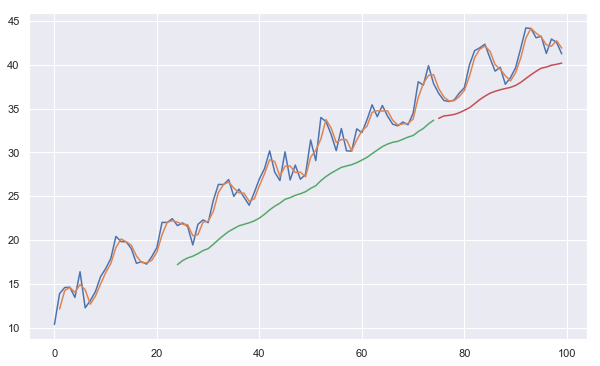

In [26]:
# smoothing approach

df['MA_2'] = df.x.rolling(window=2).mean()
df['MA_25'] = df.x.rolling(window=25).mean()

plt.figure(figsize=SIZE)
df.x.plot()
df.MA_2.plot()
df.loc[df.past == 1, 'MA_25'].plot()
df.loc[df.future == 1, 'MA_25'].plot()
plt.show()

In [25]:
y_pred = df.loc[df.future == 1, 'MA_25']

report_metrics(y_test, y_pred)

Explained Variance:
	 0.6039541659804937
MAE:
	 3.13024786921513
RMSE:
	 3.5420817818902663
MAPE:
	 nan
r^2:
	 -0.8082689168645774


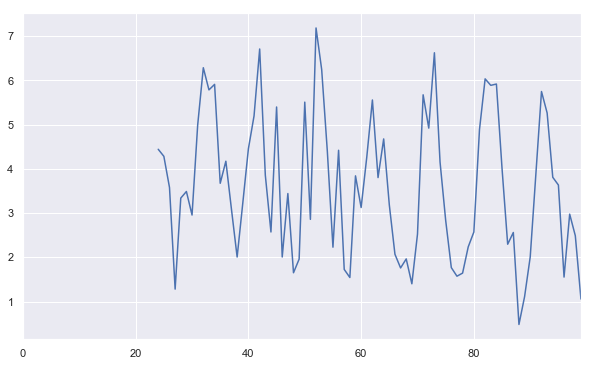

In [26]:
# does this look (more) stationary?

plt.figure(figsize=SIZE)
(df.x - df.x.rolling(window=25).mean()).plot() # original - MA_25 (detrending)
plt.show()

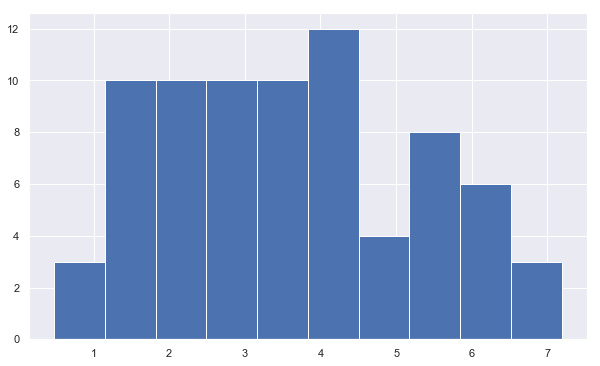

In [27]:
plt.figure(figsize=SIZE)
(df.x - df.x.rolling(window=25).mean()).hist()
plt.show()

In [28]:
# lag approach

df['lag_1'] = df.x.shift()
df.head()

,t,x,past,future,x_diff,MA_2,MA_25,lag_1
0,0,10.428441,1,0,NaN,NaN,NaN,NaN
1,1,13.928055,1,0,3.499614,12.178248,NaN,10.428441
2,2,14.630073,1,0,0.702018,14.279064,NaN,13.928055
3,3,14.669073,1,0,0.039000,14.649573,NaN,14.630073
4,4,13.505290,1,0,-1.163783,14.087181,NaN,14.669073


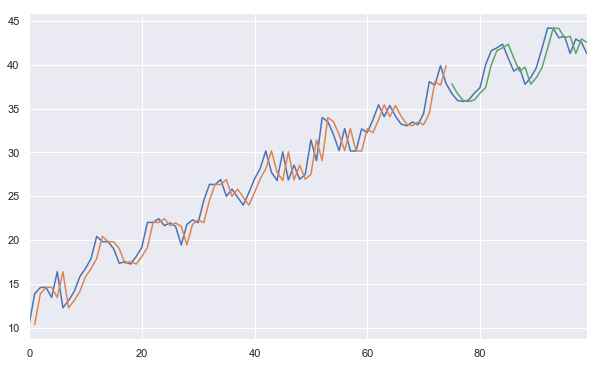

In [29]:
plt.figure(figsize=SIZE)
df.x.plot()
df.loc[df.past == 1, 'lag_1'].plot()
df.loc[df.future == 1, 'lag_1'].plot()
plt.show()

In [30]:
y_pred = df.loc[df.future == 1, 'lag_1']

report_metrics(y_test, y_pred)

Explained Variance:
	 0.7563431863233703
MAE:
	 1.0777176546575082
RMSE:
	 1.3073198247036693
MAPE:
	 nan
r^2:
	 0.7536744037681722


In [31]:
# what if we combine different ideas?

df.head()

,t,x,past,future,x_diff,MA_2,MA_25,lag_1
0,0,10.428441,1,0,NaN,NaN,NaN,NaN
1,1,13.928055,1,0,3.499614,12.178248,NaN,10.428441
2,2,14.630073,1,0,0.702018,14.279064,NaN,13.928055
3,3,14.669073,1,0,0.039000,14.649573,NaN,14.630073
4,4,13.505290,1,0,-1.163783,14.087181,NaN,14.669073


In [32]:
df_clean = df.dropna()
df_clean.head()

,t,x,past,future,x_diff,MA_2,MA_25,lag_1
24,24,21.679372,1,0,-0.785974,22.072360,17.234895,22.465347
25,25,21.981797,1,0,0.302425,21.830585,17.697029,21.679372
26,26,21.583374,1,0,-0.398424,21.782586,18.003242,21.981797
27,27,19.478527,1,0,-2.104847,20.530950,18.197180,21.583374
28,28,21.823615,1,0,2.345088,20.651071,18.483362,19.478527


In [33]:
X_train = df_clean.loc[df_clean.past == 1, ['t', 'MA_25', 'lag_1']].values
X_test = df_clean.loc[df_clean.future == 1, ['t', 'MA_25', 'lag_1']].values
y_train = df_clean.loc[df_clean.past == 1, 'x'].values
y_test = df_clean.loc[df_clean.future == 1, 'x'].values

lr = LinReg(n_jobs=-1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_trend = lr.predict(X_train)

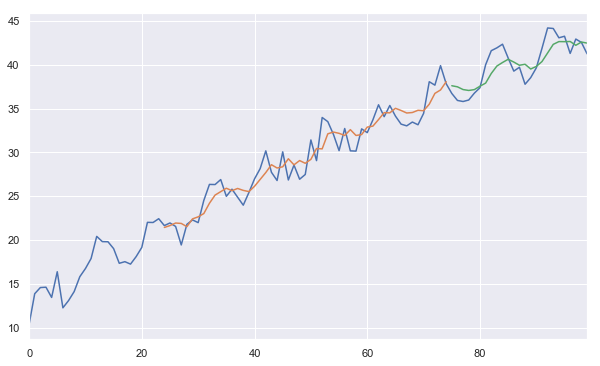

In [34]:
plt.figure(figsize=SIZE)
df['x'].plot()
plt.plot(X_train[:, 0], y_trend)
plt.plot(X_test[:, 0], y_pred)
plt.show()

In [35]:
report_metrics(y_test, y_pred)

Explained Variance:
	 0.707689031099247
MAE:
	 1.184931700643037
RMSE:
	 1.4337458049605276
MAPE:
	 2.9384147666600744
r^2:
	 0.7037283003261087


<a id='recap'></a>
## Recap

[Back to Top](#top)

By just fiddling around with some different approaches, we have accidentally built a tool-kit for constructing ARIMA models:

* trends,

* differences,

* moving averages,

* lags.

But our approach up to this point has been very haphazard. Now we will get a little more rigorous and systematic in our approach.

<center>
<img src='https://memegenerator.net/img/instances/61167552/playtimes-over-lets-get-down-to-business.jpg'>
</center>


In [27]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    plt.figure(figsize=SIZE)
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [28]:
# start fresh

df = pd.DataFrame(t, columns=['t'])
df['x'] = x

df['past'] = (df.t < 75).astype(np.int)
df['future'] = 1 - df.past

In [29]:
df.head()

,t,x,past,future
0,0,10.428441,1,0
1,1,13.928055,1,0
2,2,14.630073,1,0
3,3,14.669073,1,0
4,4,13.505290,1,0


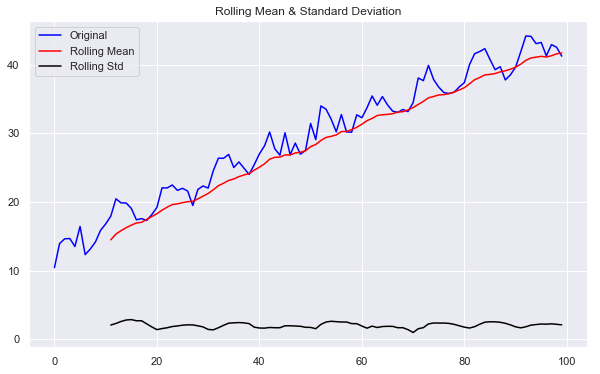

Results of Dickey-Fuller Test:
Test Statistic                 -2.599863
p-value                         0.093026
#Lags Used                     10.000000
Number of Observations Used    89.000000
Critical Value (1%)            -3.506057
Critical Value (5%)            -2.894607
Critical Value (10%)           -2.584410
dtype: float64


In [39]:
test_stationarity(df.x)

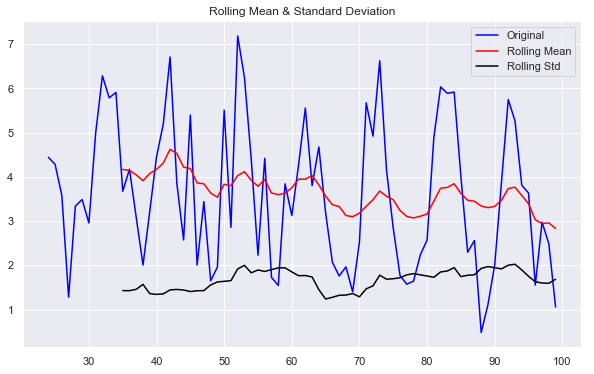

Results of Dickey-Fuller Test:
Test Statistic                 -1.308911
p-value                         0.625086
#Lags Used                     10.000000
Number of Observations Used    65.000000
Critical Value (1%)            -3.535217
Critical Value (5%)            -2.907154
Critical Value (10%)           -2.591103
dtype: float64


In [40]:
test_stationarity((df.x - df.x.rolling(window=25).mean()).dropna())

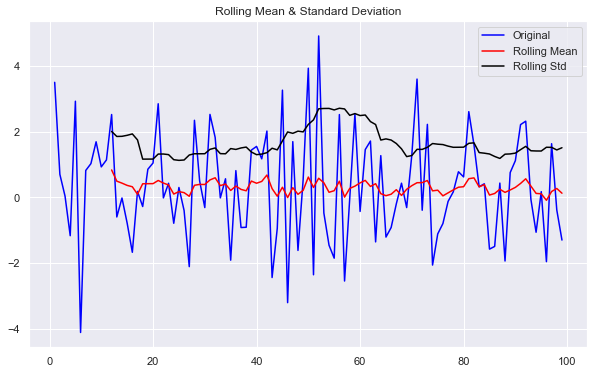

Results of Dickey-Fuller Test:
Test Statistic                -7.026195e+00
p-value                        6.355389e-10
#Lags Used                     9.000000e+00
Number of Observations Used    8.900000e+01
Critical Value (1%)           -3.506057e+00
Critical Value (5%)           -2.894607e+00
Critical Value (10%)          -2.584410e+00
dtype: float64


In [41]:
test_stationarity(df.x.diff().dropna())

In [42]:
dx = df.x.diff().dropna()

In [43]:
# YAY!

## ACF and PACF

Autocorrelation Function and Partial Autocorrelation Function

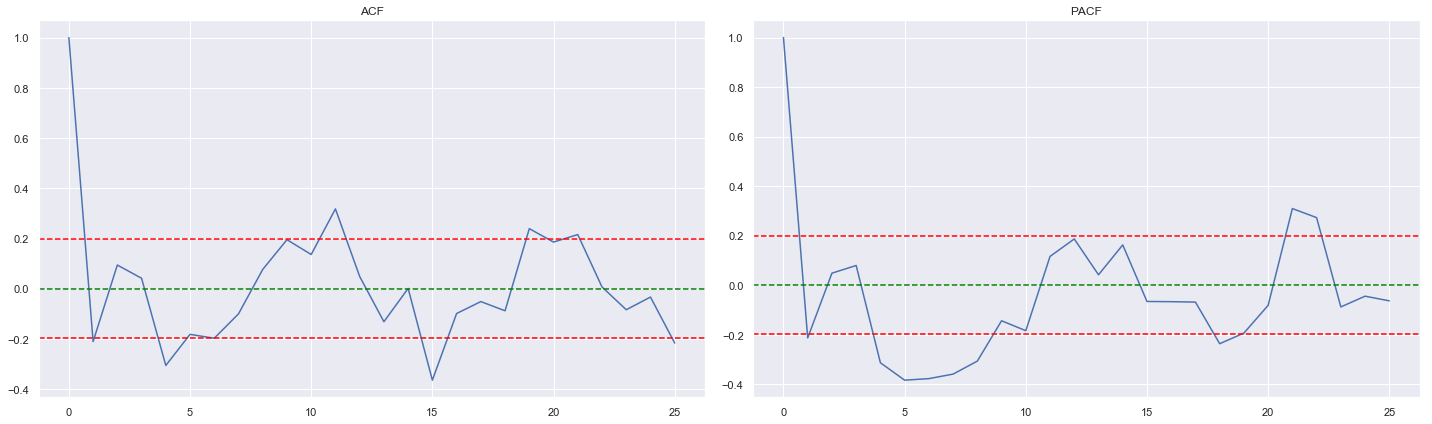

In [44]:
#ACF & PACF plots

lag_acf = acf(dx, nlags=25)
lag_pacf = pacf(dx, nlags=25, method='ols')

plt.figure(figsize=(20,6))
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='green')
plt.axhline(y=-1.96/np.sqrt(len(dx)), linestyle='--', color='red')
plt.axhline(y=1.96/np.sqrt(len(dx)), linestyle='--', color='red')
plt.title('ACF')            

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='green')
plt.axhline(y=-1.96/np.sqrt(len(dx)), linestyle='--', color='red')
plt.axhline(y=1.96/np.sqrt(len(dx)), linestyle='--', color='red')
plt.title('PACF')
            
plt.tight_layout()
plt.show()

In [48]:
count = 0
for i, acf in enumerate(lag_acf):
    if np.abs(acf) > 0.2:
        print(i, ":", acf)
        count += 1
    if count > 4:
        break

0 : 1.0
1 : -0.21091743481327085
4 : -0.3060577737881903
11 : 0.31745546019489895
15 : -0.3646242024623573


In [50]:
count = 0
for i, pacf in enumerate(lag_pacf):
    if np.abs(pacf) > 0.2:
        print(i, ":", pacf)
        count += 1
    if count > 4:
        break

0 : 1.0
1 : -0.2127433361072178
4 : -0.3131279754622306
5 : -0.3834353996061606
6 : -0.3771797953727559


In [86]:
# more is probably too complicated... so stopping here...

# Summary
# =======
# Potential Models are ARIMA(p,d,q) with:
#  * p=1, d=1, q=1,
#  * p=1, d=1, q=4,
#  * p=1, d=1, q=11,
#  * p=4, d=1, q=1,
#  * p=4, d=1, q=4,
#  * p=4, d=1, q=11,
#  * p=5, d=1, q=1,
#  * p=5, d=1, q=4,
#  * p=5, d=1, q=11

p_list = [0,1,4,5]
q_list = [0,1,4,11]

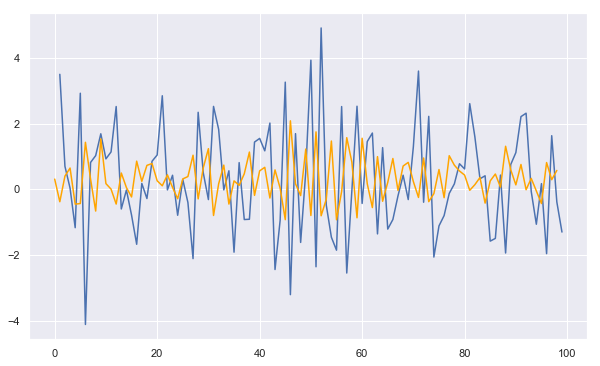

In [87]:
# Just for demonstration:
# Let's do an AR Model on dx...

# Note: d=1 implies we have a single difference (so x becomes dx)
model = ARIMA(x, order=(4,1,0))
results_AR = model.fit(disp=-1)

plt.figure(figsize=SIZE)
plt.plot(dx)
plt.plot(results_AR.fittedvalues, color='orange')
plt.show()

In [88]:
report_metrics(dx, results_AR.fittedvalues)

Explained Variance:
	 0.142535436212471
MAE:
	 1.2206979223623606
RMSE:
	 1.5448401655258508
MAPE:
	 215.23548392784923
r^2:
	 0.1425110366001353


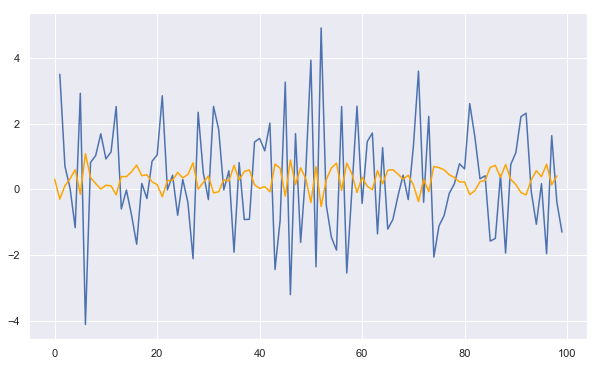

In [89]:
# Just for demonstration:
# Let's do a MA Model on dx...

# Note: d=1 implies we have a single difference (so x becomes dx)
model = ARIMA(x, order=(0,1,1))
results_MA = model.fit(disp=-1)

plt.figure(figsize=SIZE)
plt.plot(dx)
plt.plot(results_MA.fittedvalues, color='orange')
plt.show()

In [90]:
report_metrics(dx, results_MA.fittedvalues)

Explained Variance:
	 0.03955894519956449
MAE:
	 1.3177434668284163
RMSE:
	 1.634968836543174
MAPE:
	 176.86697207171343
r^2:
	 0.039537545740831015


In [91]:
import itertools

In [92]:
_list = []
for i in [zip(x, q_list) for x in itertools.permutations(p_list, len(q_list))]:
    for j in i:
        _list.append(j)

In [93]:
_list = list(set(_list))

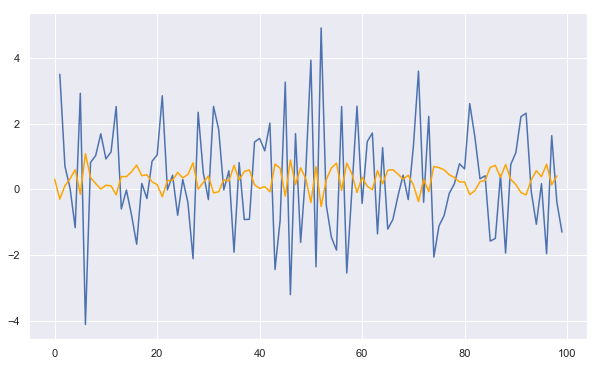

Explained Variance:
	 0.03955894519956449
MAE:
	 1.3177434668284163
RMSE:
	 1.634968836543174
MAPE:
	 176.86697207171343
r^2:
	 0.039537545740831015
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   99
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -189.094
Method:                       css-mle   S.D. of innovations              1.634
Date:                Fri, 14 Jun 2019   AIC                            384.189
Time:                        09:34:54   BIC                            391.974
Sample:                             1   HQIC                           387.339
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3081      0.132      2.328      0.022       

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


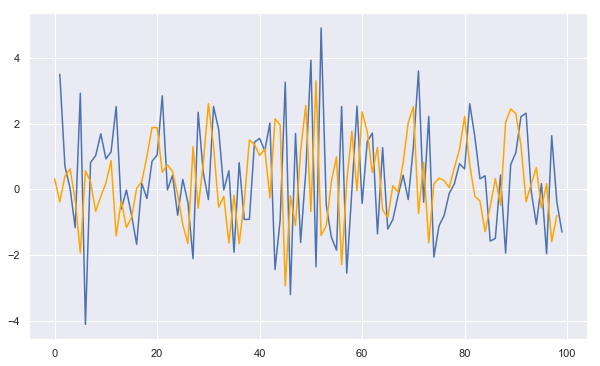

Explained Variance:
	 0.5591999857315031
MAE:
	 0.8724217947690126
RMSE:
	 1.1080974558523538
MAPE:
	 206.474928190327
r^2:
	 0.5588184424873697
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   99
Model:                 ARIMA(5, 1, 4)   Log Likelihood                -145.685
Method:                       css-mle   S.D. of innovations              0.986
Date:                Fri, 14 Jun 2019   AIC                            313.370
Time:                        09:34:58   BIC                            341.916
Sample:                             1   HQIC                           324.920
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3234      0.024     13.521      0.000       0.27

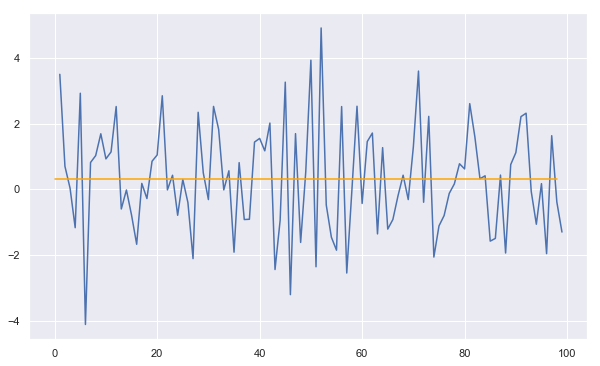

Explained Variance:
	 -2.220446049250313e-16
MAE:
	 1.3365050906020364
RMSE:
	 1.6682813046883962
MAPE:
	 186.79107209741724
r^2:
	 -2.220446049250313e-16
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   99
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -191.143
Method:                           css   S.D. of innovations              1.668
Date:                Fri, 14 Jun 2019   AIC                            386.285
Time:                        09:34:58   BIC                            391.475
Sample:                             1   HQIC                           388.385
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3111      0.168      1.856      0.067 

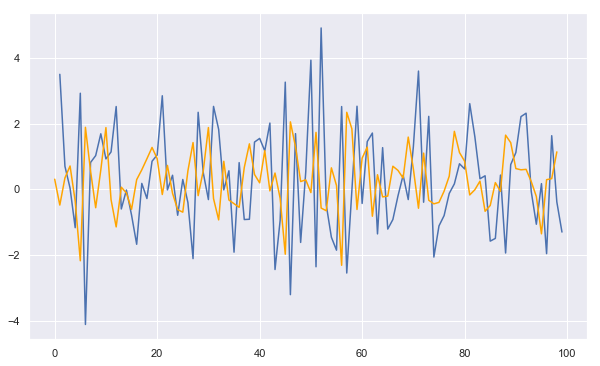

Explained Variance:
	 0.26321135372915094
MAE:
	 1.1063791384050536
RMSE:
	 1.4322597189946409
MAPE:
	 265.93679817523685
r^2:
	 0.26293635598902154
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   99
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -175.244
Method:                       css-mle   S.D. of innovations              1.411
Date:                Fri, 14 Jun 2019   AIC                            364.488
Time:                        09:34:58   BIC                            382.653
Sample:                             1   HQIC                           371.838
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3103      0.073      4.240      0.000       

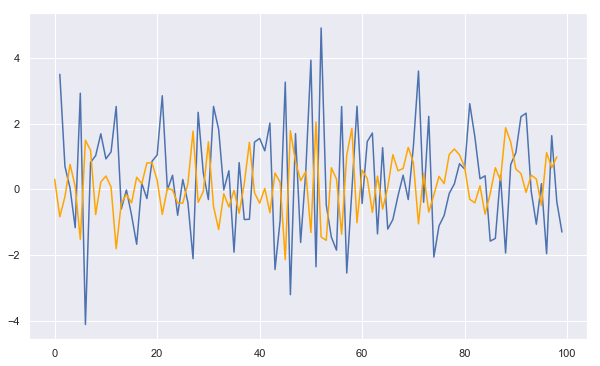

Explained Variance:
	 0.28093511140121397
MAE:
	 1.1479171570984146
RMSE:
	 1.4234358925829964
MAPE:
	 306.346776998386
r^2:
	 0.2719901436339319
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   99
Model:                 ARIMA(0, 1, 4)   Log Likelihood                -174.593
Method:                       css-mle   S.D. of innovations              1.384
Date:                Fri, 14 Jun 2019   AIC                            361.187
Time:                        09:34:59   BIC                            376.757
Sample:                             1   HQIC                           367.487
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3083      0.011     27.642      0.000       0.2

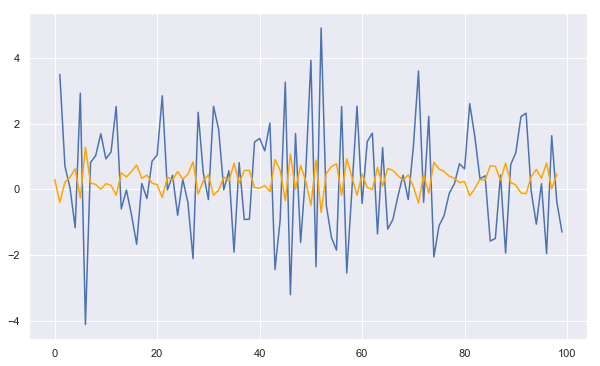

Explained Variance:
	 0.04489153489992026
MAE:
	 1.3182461343741467
RMSE:
	 1.6304207578142433
MAPE:
	 187.83831452289627
r^2:
	 0.044873651302046125
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   99
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -188.803
Method:                       css-mle   S.D. of innovations              1.629
Date:                Fri, 14 Jun 2019   AIC                            383.605
Time:                        09:34:59   BIC                            391.391
Sample:                             1   HQIC                           386.755
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3082      0.135      2.291      0.024      

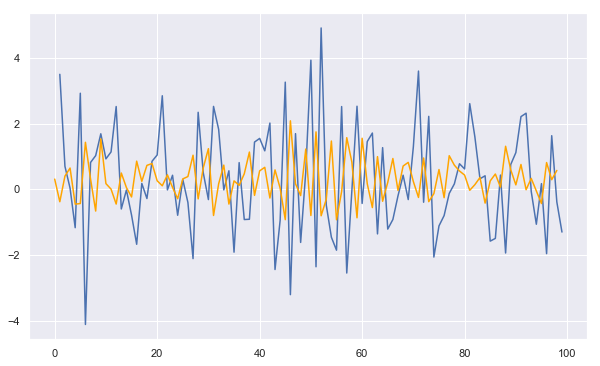

Explained Variance:
	 0.142535436212471
MAE:
	 1.2206979223623606
RMSE:
	 1.5448401655258508
MAPE:
	 215.23548392784923
r^2:
	 0.1425110366001353
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   99
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -183.360
Method:                       css-mle   S.D. of innovations              1.538
Date:                Fri, 14 Jun 2019   AIC                            378.719
Time:                        09:34:59   BIC                            394.290
Sample:                             1   HQIC                           385.019
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3134      0.112      2.803      0.006       0.0

In [103]:
for p, q in _list:
    try:
        # AR+I+MA = ARIMA model
        
        model = ARIMA(x, order=(p,1,q))
        results_ARIMA = model.fit(disp=-1)

        plt.figure(figsize=SIZE)
        plt.plot(dx)
        plt.plot(results_ARIMA.fittedvalues, color='orange')
        plt.show()
        
        report_metrics(dx, results_ARIMA.fittedvalues)
        
        print(results_ARIMA.summary())
    except:
        pass

In [99]:
?ARIMA

Init signature: ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
Docstring:     
Autoregressive Integrated Moving Average ARIMA(p,d,q) Model

Parameters
----------
endog : array-like
    The endogenous variable.
order : iterable
    The (p,d,q) order of the model for the number of AR parameters,
    differences, and MA parameters to use.
exog : array-like, optional
    An optional array of exogenous variables. This should *not* include a
    constant or trend. You can specify this in the `fit` method.
dates : array-like of datetime, optional
    An array-like object of datetime objects. If a pandas object is given
    for endog or exog, it is assumed to have a DateIndex.
freq : str, optional
    The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
    'M', 'A', or 'Q'. This is optional if dates are given.


Notes
-----
If exogenous variables are given, then the model that is fit is

.. math::

   \phi(L)(y_t - X_t\beta) = \theta(L)\epsilon_t

where :

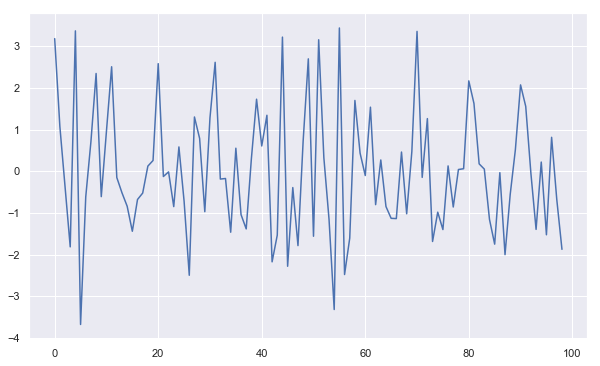

In [105]:
plt.figure(figsize=SIZE)
plt.plot(range(len(results_ARIMA.resid)),results_ARIMA.resid)
plt.show()

<a id='ex'></a>
## Your Turn...

[Back to Top](#top)

In [106]:
t = np.array(range(100))

x = 100 + t + np.sin(2*np.pi*t/10) \
  * t**.25 \
  * np.random.normal(5,3,100) 

# DESCRIPTION (of x):
# forcing some seasonality with a sinusoidal 
# adding a linear trend component 
# adding a non-linear trend component  
# injecting some noise  

df = pd.DataFrame(t, columns=['t'])
df['x'] = x

df['past'] = (df.t < 75).astype(np.int)
df['future'] = 1 - df.past

In [107]:
df.head()

,t,x,past,future
0,0,100.000000,1,0
1,1,101.598650,1,0
2,2,106.882158,1,0
3,3,110.194704,1,0
4,4,104.369926,1,0


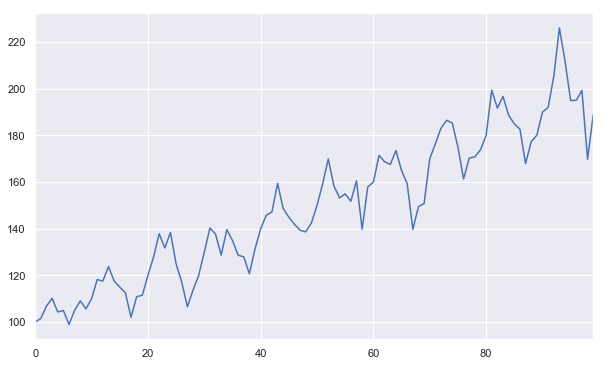

In [108]:
plt.figure(figsize=SIZE)
df['x'].plot()
plt.show()

In [ ]:
# Try to build a simple predictor for the 'future' part of our new dataset
# HINT: taking the log of the data could be useful at some point

## Seasonality

In [124]:
t = np.array(range(100))

x = 2*np.sin(2*np.pi*t/10) + np.random.normal(0,1)

df = pd.DataFrame(t, columns=['t'])
df['x'] = x

df['past'] = (df.t < 75).astype(np.int)
df['future'] = 1 - df.past

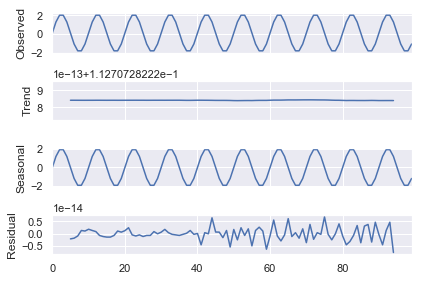

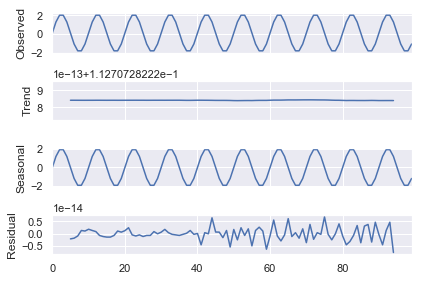

In [125]:
decomp = season(df.x, freq=10)
decomp.plot

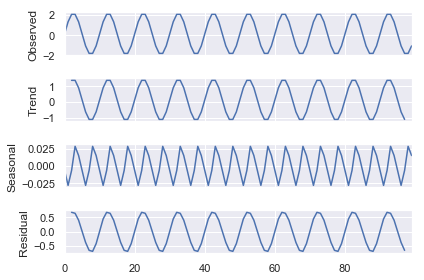

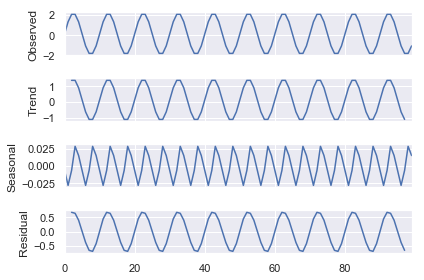

In [127]:
decomp = season(df.x, freq=5)
decomp.plot()

<a id='model'></a>
## Parsimony and Modeling

[Back to Top](#top)

>par·si·mo·ny
>    * /ˈpärsəˌmōnē/
>    * noun
>    * extreme unwillingness to spend money or use resources.
    
    
There is generally a trade-off between goodness of fit and parsimony: 

* low parsimony models (i.e. models with many parameters) tend to have a better fit than high parsimony models. 

* This is not usually a good thing; adding more parameters usually results in a good model fit for the data at hand, but that same model will likely be useless for predicting other data sets.


Finding the right balance between parsimony and goodness of fit can be challenging. Popular methods include:

* Akaike’s Information Criterion (AIC), 

* Bayesian Information Criterion (BIC), 

* Bayes Factors, 

* Minimum Description Length.

### AIC

[Akaike’s Information Criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion) compares the quality of a set of models; The AIC will rank each option from best to worst. The most parsimonious model will be the one that neither under-fits nor over-fits. *NOTE:* One downside is that the AIC says nothing about model quality --if you input a series of poor models, the AIC will choose the best from that set.

### BIC
[The Bayesian Information Criterion](https://en.wikipedia.org/wiki/Bayesian_information_criterion) (BIC) is almost the same as the AIC, although it tends to favor models with fewer parameters. 


### Bayes Factors
Bayes Factors compare models using prior distributions. It is similar to the Likelihood Ratio Test.

### MDL
Minimum Description Length (MDL): commonly used in computer and information science, it works on the basis that strings of related data can be compressed, continuous data can be discretized, hierarchical data can be "finger-printed", etc. --reducing the number of predictor variables. It may require feature engineering to be applicable.

<a id='stationarity'></a>
## Forcing Stationarity

[Back to Top](#top)

We have three techniques:

* Log-Scale Transformation,

* Smoothing Transformations:
    * moving average,
    * rolling median,
    * exponentially weighted moving average,

* Difference Tranformations


**Note:**


| Transformation |  Properties  | When to use   |  Points to keep in mind  | 
|---|---|---|---|
| Log-Scale | Converts multiplicative patterns to additi e patterns, linearizes exponential growth; converts absolute changes to percentage changes; often stabilizes variance of data with compound growth| When data is positive and highly skewed (e.g., exponential, log-normal, etc.); when variables are multiplicatively related | Logging is not the same as detrending: it linearizes growth but does not remove a trend. |
|  First Difference |  Converts "levels" to "changes" | When you need to stationarize a series with a strong trend (or random-walk-like behavior).  |  First difference of LOG(Y) is the percentage change in Y. |
| Seasonal Difference  |  Converts "levels" to "seasonal changes" | When you need to remove seasonality from your data without the trouble of estimating the seasonal indices | If you want to include long-term seasonal behavior in your data, you should not difference too much: use sARIMA instead.  |

                                               
  
